In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, max_error
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import skimage.feature
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Edward Taylor, 976335
## Load Data

In [55]:
trnData= np.load('trnImage.npy')
trnLabel= np.load('trnLabel.npy')
tstData = np.load('tstImage.npy')
tstLabel = np.load('tstLabel.npy')
labels = [1,2,3,4,5,6,7,8,9,10]
print("trnData.shape = ",trnData.shape)
print("trnLabel.shape = ",trnLabel.shape)
print("tstData.shape = ",tstData.shape)
print("tstLabel.shape = ",tstLabel.shape)

#Load Data

trnData.shape =  (32, 32, 3, 10000)
trnLabel.shape =  (10000, 1)
tstData.shape =  (32, 32, 3, 1000)
tstLabel.shape =  (1000, 1)


# Format Hog data into SxF format 
##### Used for approaches that require the data input to be in the format of sample x feature

In [3]:
#Train Data
y= 0
sftrn = []
for y in range(trnData.shape[-1]):
    hog_feature = skimage.feature.hog(trnData[:, :, :, y], pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=False)
    sftrn.append(hog_feature)
    y=y+1
    #print("at", y, "hog feature = ",hog_feature)
sftrn=np.asarray(sftrn)
sftrn.shape


(10000, 15876)

In [4]:
#Test Data
y= 0
sftst = []
for y in range(tstData.shape[-1]):
    hog_feature = skimage.feature.hog(tstData[:, :, :, y], pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=False)
    sftst.append(hog_feature)
    y=y+1
    #print("at", y, "hog feature = ",hog_feature)
sftst=np.asarray(sftst)
sftst.shape

(1000, 15876)

##### Split into test and train data

In [5]:
xtrain,xtest , ytrain, ytest = train_test_split(sftrn, trnLabel, test_size=0.2)
print("xtrain.shape = ",xtrain.shape)
print("xtest.shape = ",xtest.shape)
print("ytrain.shape = ",ytrain.shape)
print("ytest.shape = ",ytest.shape)
print(f'\nNumber of features: {xtrain.shape[1]}')
print(f'Number of training samples: {xtrain.shape[0]}')
print(f'Number of testing samples: {xtest.shape[0]}')
print(f'Number of classes: {len(np.unique(ytrain))}')
print(f'Minimums of the features are: {xtrain.min(0)}')
print(f'Maximums of the features are: {xtrain.max(0)}')
#Shows us that the data is already normalised so no need to scale it which is convenient

xtrain.shape =  (8000, 15876)
xtest.shape =  (2000, 15876)
ytrain.shape =  (8000, 1)
ytest.shape =  (2000, 1)

Number of features: 15876
Number of training samples: 8000
Number of testing samples: 2000
Number of classes: 10
Minimums of the features are: [0. 0. 0. ... 0. 0. 0.]
Maximums of the features are: [0.54768586 0.37504696 0.40824829 ... 0.37796447 0.35752805 0.42784709]


# SVM Test    

##### Initialize SVC, fit the relevant data, make predictions and produce confusion matrix and accuracy scores

In [6]:
svm = SVC()
svm.fit(xtrain,ytrain.ravel())

SVC()

In [7]:
y_predSVM = svm.predict(xtest)
cm1 = confusion_matrix(ytest, y_predSVM)
print(cm1)

[[ 96   5  17   4  17   1   5   6  45   1]
 [  5 129   3   3   2   2  14   3  28  11]
 [ 15   2  59  15  19  30  17   6  11   0]
 [  3   4  26  64  31  48  20   9   2   7]
 [ 12   4  16  14  99  13  16   6   9   5]
 [  2   2  18  30  20  87  20  11   3   3]
 [  3   7  10  12  10  11 140   2   4   1]
 [  8   1  18   9  23  27   8 119   8   5]
 [ 25  20   6   1   7   0   7   2 119   7]
 [  6  15   2   8  12   6   1   6  22 127]]


In [8]:
print("Accuracy= ",accuracy_score(ytest, y_predSVM))
print("SVM Testing Score = ",svm.score(xtest,ytest.ravel()))
print (classification_report(ytest, y_predSVM))

Accuracy=  0.5195
SVM Testing Score =  0.5195
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       197
           1       0.68      0.65      0.66       200
           2       0.34      0.34      0.34       174
           3       0.40      0.30      0.34       214
           4       0.41      0.51      0.46       194
           5       0.39      0.44      0.41       196
           6       0.56      0.70      0.62       200
           7       0.70      0.53      0.60       226
           8       0.47      0.61      0.53       194
           9       0.76      0.62      0.68       205

    accuracy                           0.52      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.53      0.52      0.52      2000



# LDA Test
##### Initialise LDA object with 2 componnents, fit the data and explain the variance in the two cases

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)

x_trainLDA = lda.fit_transform(xtrain,ytrain.ravel())
x_testLDA = lda.transform(xtest)

In [10]:
lda.explained_variance_ratio_

array([0.21126002, 0.14310757])

##### Make predictions and produce confusion matrix and accuracy scores

In [11]:
y_predLDA = lda.predict(xtest)

In [32]:
print("LDA Testing Score = ",lda.score(xtest,ytest.ravel()))
print("Accuracy= ",accuracy_score(ytest.ravel(), y_predLDA))
cm2 = confusion_matrix(ytest.ravel(), y_predLDA)
print(cm2)

LDA Testing Score =  0.306
Accuracy=  0.306
[[71 13 15 12 10  6  7 12 36 15]
 [10 93  6  9 10  4 11  3 28 26]
 [13  7 41 23 25 22 14 10 10  9]
 [ 3 10 33 40 23 38 25 16 10 16]
 [11 12 18 24 39 22 24 20 13 11]
 [ 4  4 22 25 19 48 31 20 10 13]
 [ 6 16 17 19 28 14 66 20  4 10]
 [12 10 27 20 24 22 11 81  7 12]
 [27 25  7  8 16  9  7  6 72 17]
 [10 22  9 24 18 16  6 22 17 61]]


# PCA Test
##### Initialise PCA object and set components=2, and produce score

In [14]:
pcaData = sftrn

pcaData.shape

(10000, 15876)

In [83]:
pca = PCA(n_components=2)
pca.fit(pcaData)
xpca = pca.transform(pcaData)
xpcaTst = pca.transform(sftst)


In [85]:
print(xpca.shape)
print(xpca[0,:])
print(xpcaTst.shape)
print(xpcaTst[0,:])

(10000, 2)
[-0.02520781  0.32902443]
(1000, 2)
[2.44237148 0.66868596]


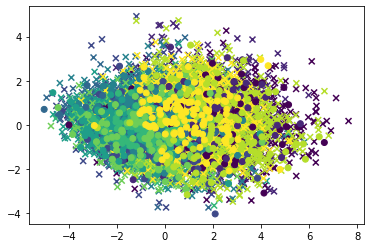

In [90]:
#print("pca testing score = ", pca.score(xtest,ytest.ravel()))
plt.figure()
plt.scatter(xpca[:,0],xpca[:,1],c=trnLabel,marker = 'x')
plt.scatter(xpcaTst[:,0],xpcaTst[:,1],c=tstLabel,marker = 'o')

# Neural Networks (NN + CNN)
##### Re-order data as is required to be passed into function in specific order of S,H,W,C
##### This is nessisary as the functions require data to be passed in this specific order for the libraries to be able to process it

In [39]:
print("Train Data Original Shape = ",trnData.shape)
print("Test Data Original Shape = ",tstData.shape)
print("Train Label Original Shape = ",trnLabel.shape)
print("Test Label Original Shape = ",tstLabel.shape)

trnDataT = np.transpose(trnData,(3,0,1,2))
tstDataT = np.transpose(tstData,(3,0,1,2))

print("\nTransposed Train Data Shape = ",trnDataT.shape)
print("Transposed Test Data Shape = ",tstDataT.shape)

Train Data Original Shape =  (32, 32, 3, 10000)
Test Data Original Shape =  (32, 32, 3, 1000)
Train Label Original Shape =  (10000, 1)
Test Label Original Shape =  (1000, 1)

Transposed Train Data Shape =  (10000, 32, 32, 3)
Transposed Test Data Shape =  (1000, 32, 32, 3)


## Neural Network...

In [40]:
xtrain,xtest , ytrain, ytest = train_test_split(trnDataT, trnLabel, test_size=0.2)

In [41]:
print("xtrain.shape = ",xtrain.shape)
print("xtest.shape = ",xtest.shape)
print("ytrain.shape = ",ytrain.shape)
print("ytest.shape = ",ytest.shape)
print("\ntrnDataT.shape = ", trnDataT.shape)

rxtrain = np.reshape(xtrain, [xtrain.shape[0], -1])
rxtest = np.reshape(xtest, [xtest.shape[0], -1])
trnDataTN = trnDataT[:,:,:,0]

print("\nrxtrain.shape = ",rxtrain.shape)
print("rxtest.shape = ",rxtest.shape)
print("\ntrnDataTN.shape = ",trnDataTN.shape)

xtrain.shape =  (8000, 32, 32, 3)
xtest.shape =  (2000, 32, 32, 3)
ytrain.shape =  (8000, 1)
ytest.shape =  (2000, 1)

trnDataT.shape =  (10000, 32, 32, 3)

rxtrain.shape =  (8000, 3072)
rxtest.shape =  (2000, 3072)

trnDataTN.shape =  (10000, 32, 32)


##### Build Neural Network model using transposed data


In [42]:
modelNN = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(10000, activation =tf.nn.relu),
    tf.keras.layers.Dense(1000, activation =tf.nn.relu),
    tf.keras.layers.Dense(10, activation =tf.nn.softmax)])
modelNN.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())

historyNN = modelNN.fit(rxtrain,ytrain, epochs=30,validation_split=0.2, verbose =1)

Epoch 1/30
200/200 [==============================] - 51s 255ms/step - loss: 2.0534 - sparse_categorical_accuracy: 0.2522 - val_loss: 1.9285 - val_sparse_categorical_accuracy: 0.3081
Epoch 2/30
200/200 [==============================] - 51s 256ms/step - loss: 1.8552 - sparse_categorical_accuracy: 0.3373 - val_loss: 1.8110 - val_sparse_categorical_accuracy: 0.3375
Epoch 3/30
200/200 [==============================] - 48s 242ms/step - loss: 1.7709 - sparse_categorical_accuracy: 0.3681 - val_loss: 1.7519 - val_sparse_categorical_accuracy: 0.3875
Epoch 4/30
200/200 [==============================] - 48s 240ms/step - loss: 1.7029 - sparse_categorical_accuracy: 0.4014 - val_loss: 1.7273 - val_sparse_categorical_accuracy: 0.3806
Epoch 5/30
200/200 [==============================] - 52s 259ms/step - loss: 1.6567 - sparse_categorical_accuracy: 0.4148 - val_loss: 1.7074 - val_sparse_categorical_accuracy: 0.3844
Epoch 6/30
200/200 [==============================] - 53s 266ms/step - loss: 1.6089 -

##### Data evaluated using plots, .evaluate and .summary

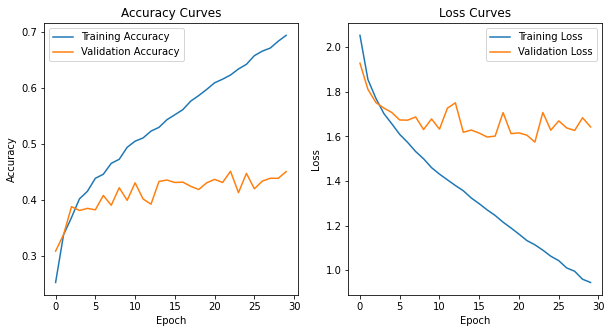

63/63 [==============================] - 3s 47ms/step - loss: 1.6135 - sparse_categorical_accuracy: 0.4445


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             30730000  
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 40,741,010
Trainable params: 40,741,010
Non-trainable params: 0
_________________________________________________________________


In [45]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(historyNN.history['sparse_categorical_accuracy'])
plt.plot(historyNN.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(historyNN.history['loss'])
plt.plot(historyNN.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

modelNN.evaluate(rxtest,ytest)
print("\n")
modelNN.summary()

## Convolutional Neural Network...
##### CNN uses similar transposed data

In [46]:
xtrain,xtest , ytrain, ytest = train_test_split(trnDataT, trnLabel, test_size=0.2)

In [48]:
print("xtrain.shape = ",xtrain.shape)
print("xtest.shape = ",xtest.shape)
print("ytrain.shape = ",ytrain.shape)
print("ytest.shape = ",ytest.shape)

ytrainCNN = keras.utils.to_categorical(ytrain, 10)
ytestCNN = keras.utils.to_categorical(ytest, 10)
print("ytrainCNN.shape = ",ytrainCNN.shape)
print("ytestCNN.shape = ",ytestCNN.shape)

xtrain.shape =  (8000, 32, 32, 3)
xtest.shape =  (2000, 32, 32, 3)
ytrain.shape =  (8000, 1)
ytest.shape =  (2000, 1)
ytrainCNN.shape =  (8000, 10)
ytestCNN.shape =  (2000, 10)


##### Build CNN
##### Here I made multiple tweaks to improve accuracy. 1) added padding, 2) changed activation method to LeakyReLU, 3) added an additional layer

In [50]:
# idea of adding padding https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
# usef leakyRelU activation to increase from 52->61 https://www.machinecurve.com/index.php/2019/11/12/using-leaky-relu-with-keras/
num_classes = 10
input_shape = (32, 32, 3)

modelCNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4),padding="same", activation=tf.keras.layers.LeakyReLU()),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(4, 4),padding="same", activation=tf.keras.layers.LeakyReLU()),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(4, 4),padding="same", activation=tf.keras.layers.LeakyReLU()),
        layers.MaxPooling2D(pool_size=(2, 2)),
    
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

##### Compile CNN

In [51]:
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
historyCNN = modelCNN.fit(xtrain, ytrainCNN, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
50/50 [==============================] - 21s 413ms/step - loss: 1.9990 - accuracy: 0.2689 - val_loss: 1.7805 - val_accuracy: 0.3444
Epoch 2/15
50/50 [==============================] - 19s 390ms/step - loss: 1.6845 - accuracy: 0.3973 - val_loss: 1.6037 - val_accuracy: 0.4231
Epoch 3/15
50/50 [==============================] - 20s 390ms/step - loss: 1.5246 - accuracy: 0.4455 - val_loss: 1.5268 - val_accuracy: 0.4475
Epoch 4/15
50/50 [==============================] - 18s 365ms/step - loss: 1.4217 - accuracy: 0.4859 - val_loss: 1.4474 - val_accuracy: 0.4694
Epoch 5/15
50/50 [==============================] - 18s 366ms/step - loss: 1.3354 - accuracy: 0.5213 - val_loss: 1.3910 - val_accuracy: 0.4906
Epoch 6/15
50/50 [==============================] - 19s 374ms/step - loss: 1.2635 - accuracy: 0.5456 - val_loss: 1.3147 - val_accuracy: 0.5256
Epoch 7/15
50/50 [==============================] - 18s 369ms/step - loss: 1.2163 - accuracy: 0.5559 - val_loss: 1.2934 - val_accuracy: 0.5394

##### Evaluate CNN

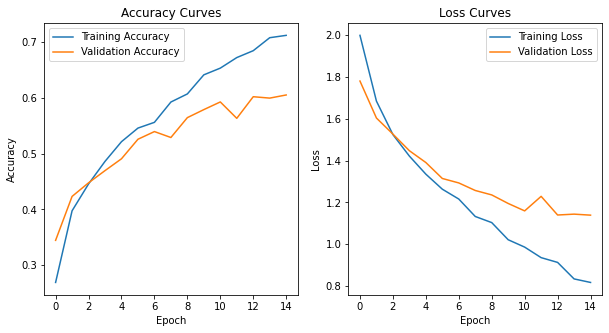

63/63 [==============================] - 2s 30ms/step - loss: 1.1249 - accuracy: 0.6060


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
______________________________

In [53]:
CNNprediction = modelCNN.predict(xtest)
xtest.shape


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()



modelCNN.evaluate(xtest,ytestCNN)
print("\n")
modelCNN.summary()